# SIPRI MIlitary Expenditure dataset

## Carrie Little

### Import Necessary Libraries

In [4]:
# Import All Necessary Libraries
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt   
import seaborn as sns  
import scipy.stats as stats          
import cvxpy as cp

In [7]:
# Load Dataset
df = pd.read_csv('../Data/Cleaned_merged_SIPRI_Region_ACLED.csv')                            # Load Dataset as Dataframe
print(df.head())                                                                     # Diaplay 1st 5 inDataframe

FileNotFoundError: [Errno 2] No such file or directory: '/data/Cleaned_merged_SIPRI_Region_ACLED.csv'

### Dataframe Info

In [8]:
# Dataframe Info
df.info()                                                                            # General information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8449 entries, 0 to 8448
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             8449 non-null   object 
 1   Year                                8449 non-null   int64  
 2   Expenditure-Share_of_Govt_spending  4553 non-null   float64
 3   Expenditure-Share_of_GDP            8083 non-null   float64
 4   Expenditure_Per_Capita              5172 non-null   float64
 5   Expenditure_Constant_2022           8184 non-null   float64
 6   Region                              8449 non-null   object 
 7   Subregion                           8449 non-null   object 
 8   index_level                         8449 non-null   int64  
 9   total_rank_from_avg_rank            8449 non-null   int64  
 10  avg_rank                            8449 non-null   float64
 11  Deadliness_rank                     8449 no

### Descriptive statistics

In [9]:
# Descriptive Statistics
# Describe
summary_stats = df.describe()                                                         # Create a Dataframe of Descriptive Statistics
summary_stats                                                                         # Display the Dataframe of Descriptive Statistics

,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,index_level,total_rank_from_avg_rank,avg_rank,Deadliness_rank,Diffusion_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
count,8449.000000,4553.000000,8.083000e+03,5172.000000,8184.000000,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000,...,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000,8449.000000
mean,1993.772281,0.076972,2.738691e-02,224.490050,11201.755247,3.426678,83.091372,68.780033,77.125695,42.873831,...,77.944135,1006.634040,0.005921,300.927684,24.539709,0.025211,0.008569,0.046454,0.016155,0.096331
std,19.093178,0.065925,3.160214e-02,423.713943,64462.041355,0.952023,49.544186,33.848016,41.237183,13.718721,...,43.272204,3376.836444,0.023717,800.337069,136.331475,0.084571,0.034323,0.123547,0.089751,0.257386
min,1948.000000,0.000672,1.720000e-07,0.071803,0.000000,1.000000,2.000000,4.250000,2.000000,2.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1979.000000,0.033013,1.199383e-02,14.041655,112.730799,3.000000,41.000000,40.750000,41.000000,37.000000,...,41.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000309,0.000658,0.001000
50%,1996.000000,0.055948,1.909058e-02,56.692475,789.994874,4.000000,79.000000,71.250000,81.000000,51.000000,...,74.000000,9.000000,0.000000,18.000000,3.000000,0.000225,0.000000,0.002779,0.001975,0.006000
75%,2010.000000,0.100211,3.199943e-02,253.179119,4326.669859,4.000000,129.000000,100.000000,125.000000,51.000000,...,117.000000,314.000000,0.001000,177.000000,12.000000,0.007864,0.001447,0.027323,0.007900,0.048000
max,2023.000000,0.581707,1.173498e+00,9645.058184,990485.412100,4.000000,160.000000,114.750000,125.000000,51.000000,...,136.000000,37014.000000,0.176000,5426.000000,1519.000000,0.926995,0.254703,0.837604,1.000000,1.940000


### Histogram

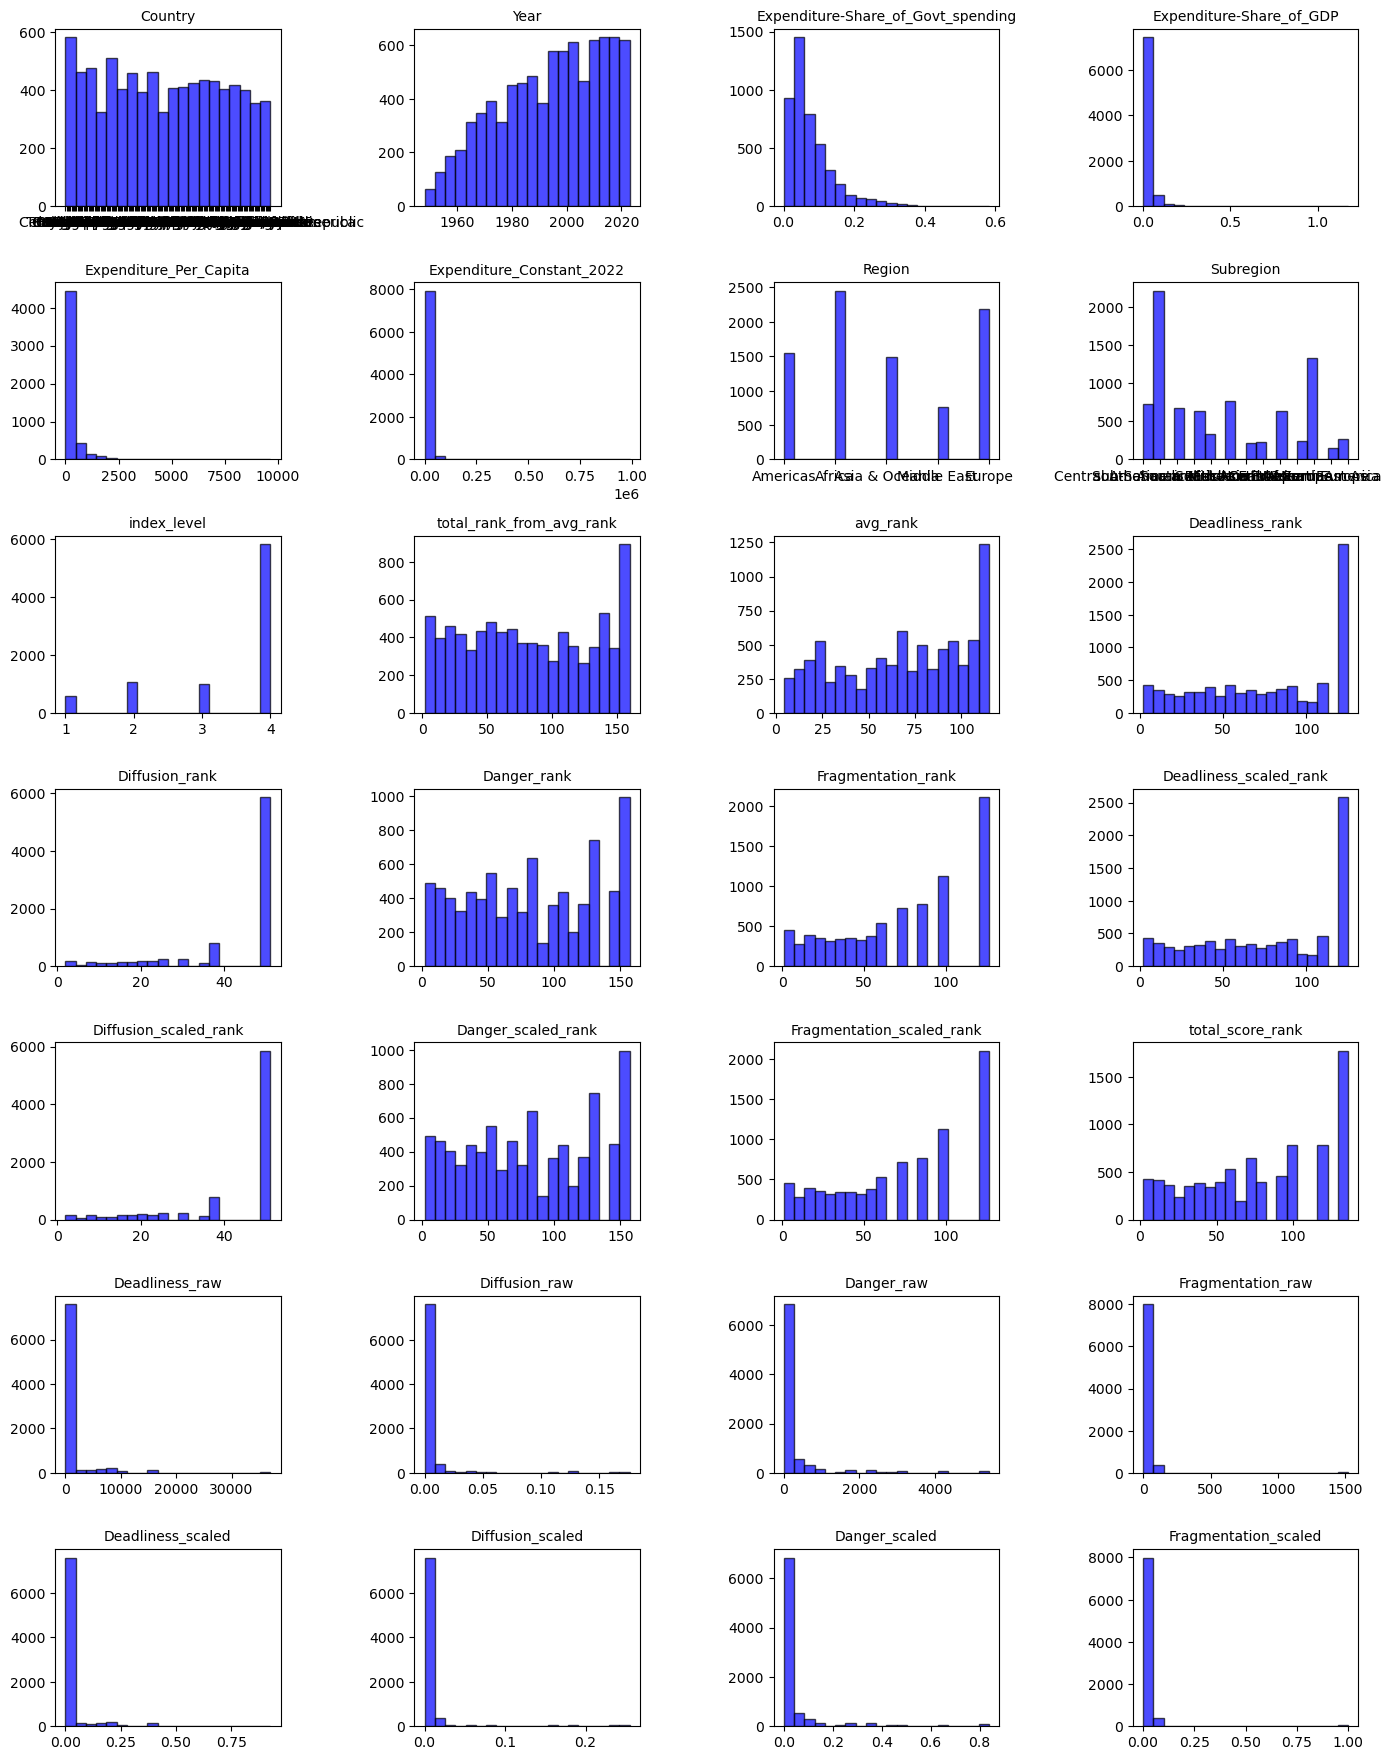

In [22]:
# Descriptive Plots
# Histogram
num_columns = len(df.columns) - 1  # Exclude the last 'DBSCAN_Cluster' column
num_rows = (num_columns // 4) + 1

plt.figure(figsize=(14, num_rows * 2.5))

# Iterate through each Attribute and create a histogram
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the last 'DBSCAN_Cluster' column
    plt.subplot(num_rows, 4, i)  # Creating a grid of subplots
    plt.hist(df[column], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(column, fontsize=10)
   
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

**References**

ChatGPT, (2024) GPT-4o version, OpenAI. [Large language model]. https://chatgpt.com/


</div>
